# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
temps = []
humid = []
cloudiness = []
wind_speed = []
lats = []

#create query url
for city in cities:
    data = requests.get(url).json()
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(query).json()
    
    try:
        temp = response['main']['temp_max']
        temps.append(temp)
        hum = response['main']['humidity']
        humid.append(hum)
        cloud = response['clouds']['all']
        cloudiness.append(cloud)
        wind = response['wind']['speed']
        wind_speed.append(wind)
        lat = response['coord']['lat']
        lats.append(lat)
        
    except KeyError:
        print(city, wind)

cheuskiny 3.36
cam pha 0.98
mys shmidta 6.93
taolanaro 27.51
maulvi bazar 8.25
skagastrond 17.22
kamenskoye 3
amderma 5.82
one hundred mile house 5.82
samusu 11.41
tsihombe 10.94
bargal 16.11
umzimvubu 11.41
illoqqortoormiut 6.06
afanasyevo 5.28
grand river south east 5.59
bengkulu 7
nagsabaran 7.94
belushya guba 9.17
scottsburgh 9.17
labutta 25.28
warqla 23.17
angra 12.75
nizhneyansk 13.85
kyra 13.85
jibuti 2.89
karkaralinsk 6.93
attawapiskat 3.36
vaitupu 12.75
barentsburg 19.46
kismayo 6.22
acarau 1.88
hihifo 2.26
mrirt 6.93
naftah 7.81
saleaula 13.87
sentyabrskiy 1.99
tabiauea 2.53
gurupa 3.44
mahadday weyne 3.44
mullaitivu 3.65
yefira 5.82
barawe 12.33
mahaicony 6.96
grand centre 10.29
tidore 25.28
masjed-e soleyman 25.28
samalaeulu 9.17
meyungs 5.95
korla 7.49
kazalinsk 13.87
barbar 3.74
faridan 2.55
odweyne 20.8
fort saint john 20.8
el balyana 0.67
asau 3.36
satitoa 3.36


In [8]:

#create dataframe
weather_df = pd.DataFrame({
    "Temperature": temps,
    "Humidity": humid,
    "Clouds": cloudiness,
    "Wind": wind_speed,
    "Latitude": lats,
})
weather_df.head()

,Temperature,Humidity,Clouds,Wind,Latitude
0,66.29,86,0,11.92,-23.58
1,71.60,73,40,17.22,15.13
2,46.40,65,75,3.36,49.12
3,32.00,81,90,11.41,62.45
4,55.40,87,90,1.77,34.90


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
import datetime
date = datetime.datetime.now()
print(dir(datetime))
current_date = ("(" + str(date.month) + "/" + str(date.day) + "/" + str(date.year) + ")")
current_date

['MAXYEAR', 'MINYEAR', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


'(4/19/2019)'

In [89]:
# csv
# weather_data_df.to_csv("output_data/WeatherDataCities.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

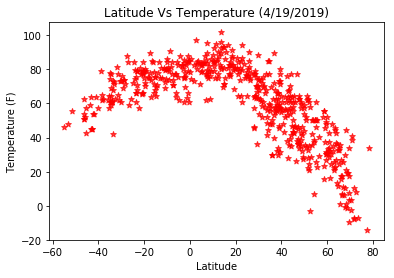

In [11]:

#scatter plot Latitude vs Max Temp
import datetime
plt.scatter(lats, temps, marker="*", facecolors="red", alpha=0.75)
x_lim = 100
plt.title("Latitude Vs Temperature" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Temperature_Vs_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

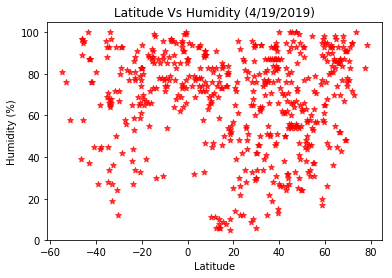

In [12]:
#scatter plot of Humidity vs latitude
plt.scatter(lats, humid, marker="*", facecolors="red", alpha=0.75)

plt.title("Latitude Vs Humidity" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Humidity_Vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

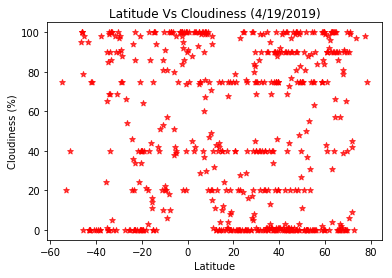

In [13]:
#scatter plot of Latitude Vs Cloudiness
plt.scatter(lats, cloudiness, marker="*", facecolors="red", alpha=0.75)

plt.title("Latitude Vs Cloudiness" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Cloudiness_Vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

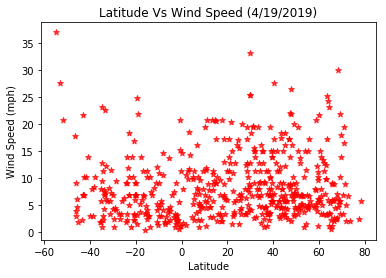

In [14]:
# scatter plot of latitude vs wind speed
plt.scatter(lats, wind_speed, marker="*", facecolors="red", alpha=0.75)

plt.title("Latitude Vs Wind Speed" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Wind_speed_Vs_Latitude.png")
plt.show()